In [15]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [22]:
df = yf.download(
        "SPY",                    # Ticker symbol
        start="2018-01-01",       # Start date  
        end="2025-07-20",         # End date (recent)
        progress=False,           # Don't show progress bar
        auto_adjust=True          # Adjust for splits/dividends
    )
print(f"\n🔍 First 3 rows:")
print(df.head(10))



🔍 First 3 rows:
Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2018-01-02  238.568695  238.604208  237.352644  237.743204   86655700
2018-01-03  240.077728  240.228638  238.737396  238.737396   90070400
2018-01-04  241.089600  241.577813  240.139854  240.725695   80636400
2018-01-05  242.696274  242.820528  241.391454  241.888526   83524000
2018-01-08  243.140045  243.299812  242.305669  242.598576   57319200
2018-01-09  243.690414  244.320625  243.282084  243.566133   57254000
2018-01-10  243.317535  243.583841  242.252394  242.926975   69574300
2018-01-11  245.092789  245.092789  243.708086  243.876738   62361500
2018-01-12  246.690613  246.859238  245.057347  245.359165   90816100
2018-01-16  245.847336  248.616742  245.146099  247.959903  106555100


✅ SPY data is loaded and ready!
📊 We have 1896 days of data


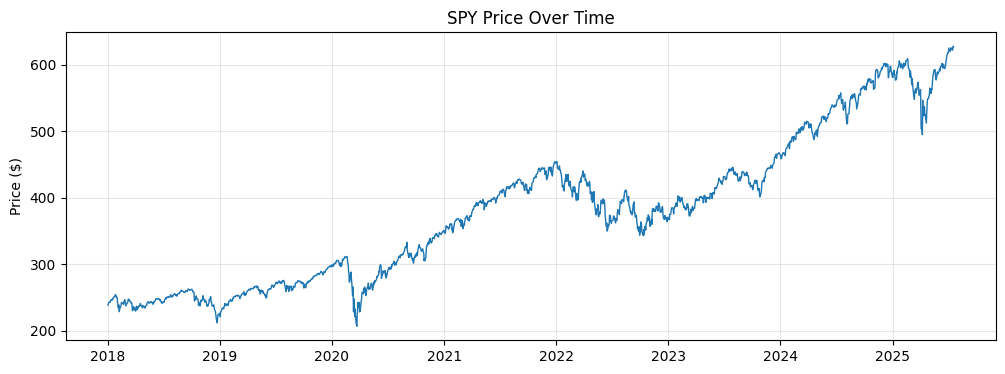

In [24]:
# Quick test to verify our data is working
if 'df' in globals() and not df.empty:
    print("✅ SPY data is loaded and ready!")
    print(f"📊 We have {len(df)} days of data")
    #print(f"💰 Price range: ${df['Close'].min():.2f} - ${df['Close'].max():.2f}")
    
    # Quick visualization
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df['Close'], linewidth=1)
    plt.title("SPY Price Over Time")
    plt.ylabel("Price ($)")
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("❌ Data not loaded yet. Please run the data collection cell above.")


In [38]:
import pandas as pd
import numpy as np

# Assume spy_data is your downloaded DataFrame with columns ['Open','High','Low','Close','Volume']

# 1. Define an RSI helper
def compute_rsi(series: pd.Series, window: int) -> pd.Series:
    delta    = series.diff()
    gain     = delta.clip(lower=0)
    loss     = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs       = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


#   a) Target: next-day return
df['Next_Return'] = df['Close'].pct_change().shift(-1)

#   b) 5-day moving average
df['MA5'] = df['Close'].rolling(window=5).mean()

#   c) 5-day z-score
close_df = df['Close']              # this is a DataFrame
close = close_df.squeeze()          # now a Series if it had exactly one column

# Recompute features on the Series:
ma5 = close.rolling(window=5).mean()
std5 = close.rolling(window=5).std()

df['MA5'] = ma5
df['Z5']  = (close - ma5) / std5   # close, ma5, std5 are all Series

#   d) 14-day RSI
df['RSI14'] = compute_rsi(df['Close'], window=14)

#   e) 10-day volatility (std of daily pct changes)
df['Vol10'] = df['Close'].pct_change().rolling(window=10).std()

# 3. Drop incomplete rows
df_clean = df.dropna()

# 4. Inspect
print(df_clean[['Next_Return','MA5','Z5','RSI14','Vol10']].head(10))


Empty DataFrame
Columns: [(Next_Return, ), (MA5, ), (Z5, ), (RSI14, ), (Vol10, )]
Index: []
